# Práctica 1
1. *Agustín* *Prieto*
2. *Jesús* *Sanz*

In [155]:
import matplotlib.pyplot as plt
import pdb
import random
from time import time
from time import perf_counter
import numpy as np
#!pip install pysnooper
import pysnooper

In [156]:
def Burbuja(a,n):
    for i in range(1,n):
        for j in range(0,n-i):
            if(a[j] > a[j+1]):
                k = a[j+1]
                a[j+1] = a[j]
                a[j] = k;

In [157]:
def Insercion(a,n):
    for i in range(1,n):
        v=a[i]
        j=i-1
        while j >= 0 and a[j] > v:
            a[j+1] = a[j]
            j=j-1
        a[j+1]=v

In [158]:
def Seleccion(a,n):
    for i in range(0,n-1):
        min=i
        for j in range(i+1,n):
            if a[min] > a[j]:
                min=j
        aux=a[min]
        a[min]=a[i]
        a[i]=aux

In [159]:
def QuickSort(a,iz,de):
    i=iz
    j=de
    #
    # Selección del pivote
    # Elegir uno a descomentar
    #
    # Pivote en la mediana
    #x=a[int((iz + de)/2)]
    # Pivote en el lado izquierdo
    x=a[iz]
 
    while( i <= j ):
        while a[i]<x and j<=de:
            i=i+1
        while x<a[j] and j>iz:
            j=j-1
        if i<=j:
            aux = a[i]; a[i] = a[j]; a[j] = aux;
            i=i+1;  j=j-1;
 
    if iz < j:
        QuickSort( a, iz, j );
    if i < de:
        QuickSort( a, i, de );

In [160]:
def MergeSort(a,n):
    if n>1:
        m = n//2;
        l = a[:m]
        r = a[m:]

        MergeSort(l,len(l))
        MergeSort(r,len(r))

        i=0; j=0; k=0
        while i < len(l) and j < len(r):
            if l[i] < r[j]:
                a[k]=l[i]
                i=i+1
            else:
                a[k]=r[j]
                j=j+1
            k=k+1

        while i < len(l):
            a[k]=l[i]
            i=i+1
            k=k+1

        while j < len(r):
            a[k]=r[j]
            j=j+1
            k=k+1

In [161]:
def GeneraR(n):
    a=[]
    for i in range(0,n):
        a.append(random.randrange(0, n, 1))
    return a

In [162]:
def GeneraD(n):
    a=[]
    for i in range(0,n):
        a.append(i)
    return a  

In [163]:
def GeneraI(n):
    a=[]
    for i in range(0,n):
        a.append(n-i)
    return a   

In [164]:
def imprime(a,n):
    for i in range(0,n):
        print (a[i])

In [165]:
def experimento(n):
        V_random_burbuja =[]  # RANDOM
        V_random_seleccion = []
        V_random_insercion = []
        V_directo_burbuja =[]  # DIRECTO
        V_directo_seleccion = []
        V_directo_insercion = []
        V_inverso_burbuja = []
        V_inverso_seleccion = []
        V_inverso_insercion = []
        V1 =[]  # INVERSO
        
    # Orden directo
        V2=GeneraD(n)
    # Orden inverso
        V3=GeneraI(n)
    # Experimento aleatorio
        tb = 0 # BURBUJA
        ti = 0 # INSERCION
        ts = 0 # SELECCION

        V_random_burbuja_copy = [0,0,0,0,0,0,0,0,0,0]
        V_random_insercion_copy = [0,0,0,0,0,0,0,0,0,0]
        V_random_seleccion_copy = [0,0,0,0,0,0,0,0,0,0]

        for _ in range(10):
# Aleatorio. 10 experimentos
# Realizar experimentos y completar las listas usando GeneraR(n)
            V1 = GeneraR(n)
            # BURBURJA
            tb = perf_counter()
            Burbuja(V1,n)
            tb = perf_counter() - tb
            V_random_burbuja.append(tb)
            # INSERCION
            ti = perf_counter()
            Insercion(V1,n)
            ti = perf_counter() - ti
            V_random_insercion.append(ti)
            # SELECCION
            ts = perf_counter()
            Seleccion(V1,n)
            ts = perf_counter() - ts
            V_random_seleccion.append(ts)
            

# Experimento directo
        # BURBURJA
        tb = perf_counter()
        Burbuja(V2,n)
        tb = perf_counter() - tb
        V_directo_burbuja.append(tb)
        # INSERCION
        ti = perf_counter()
        Insercion(V2,n)
        ti = perf_counter() - ti
        V_directo_insercion.append(ti)
        # SELECCION
        ts = perf_counter()
        Seleccion(V2,n)
        ts = perf_counter() - ts
        V_directo_seleccion.append(ts)

# Experimento inverso
        # BURBURJA
        tb = perf_counter()
        Burbuja(V3,n)
        tb = perf_counter() - tb
        V_inverso_burbuja.append(tb)
        # INSERCION
        ti = perf_counter()
        Insercion(V3,n)
        ti = perf_counter() - ti
        V_inverso_insercion.append(ti)
        # SELECCION
        ts = perf_counter()
        Seleccion(V3,n)
        ts = perf_counter() - ts
        V_inverso_seleccion.append(ts)

        return np.mean(np.array(V_random_burbuja)),np.mean(np.array(V_random_seleccion)),np.mean(np.array(V_random_insercion)),V_directo_burbuja,V_directo_seleccion,V_directo_insercion,V_inverso_burbuja,V_inverso_seleccion,V_inverso_insercion


In [166]:
# Listas iniciales
X  =[]
TI1=[]
TS1=[]  
TB1=[]  
TI2=[]
TS2=[]  
TB2=[] 
TI3=[]
TS3=[]  
TB3=[]  
# Lista de tamaños
Tam=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# Rellenar las listas con los experimentos

for i in Tam:
    k = i*100
    a,b,c,d,e,f,g,h,j = experimento(k)
    TB1.append(a)
    TS1.append(b)
    TI1.append(c)
    TB2.append(d)
    TS2.append(e)
    TI2.append(f)
    TB3.append(g)
    TS3.append(h)
    TI3.append(j)
# Presentar resultados

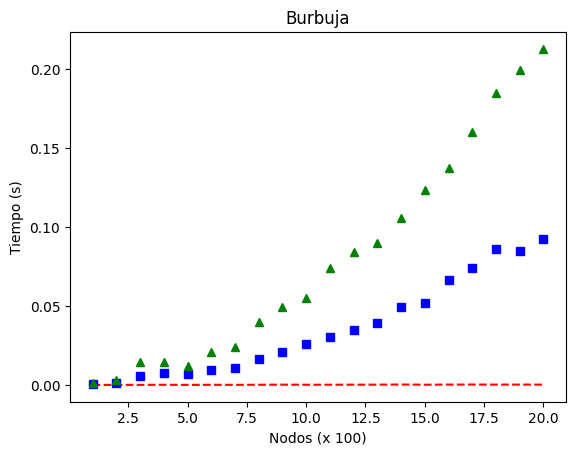

In [167]:
# Se imprimen las respectivas listas con pyplot
plt.plot(Tam,TI1,'r--',Tam,TS1,'bs',Tam,TB1,'g^')
plt.title('Burbuja')
plt.ylabel('Tiempo (s)')
plt.xlabel('Nodos (x 100)')
plt.show()

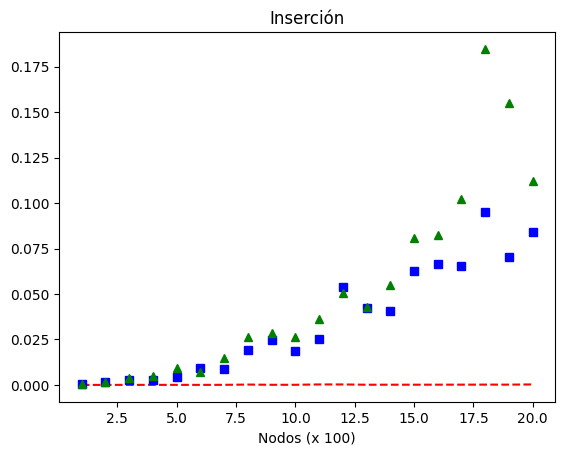

In [168]:
plt.plot(Tam,TI2,'r--',Tam,TS2,'bs',Tam,TB2,'g^')
plt.title('Inserción')
plt.xlabel('Nodos (x 100)')
plt.show()

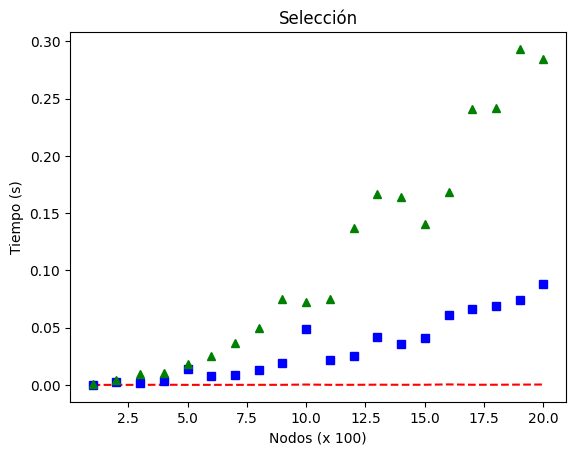

[np.float64(2.7409993344917892e-05), np.float64(4.57499991171062e-05), np.float64(7.087999838404358e-05), np.float64(0.00011958999384660274), np.float64(6.0180004220455884e-05), np.float64(0.00011260000173933804), np.float64(7.773999823257327e-05), np.float64(0.0001256099989404902), np.float64(0.00019893999851774424), np.float64(0.00013918999757152052), np.float64(0.0001493099960498512), np.float64(0.00016925999952945858), np.float64(0.0001917999965371564), np.float64(0.0002727299957768992), np.float64(0.00016742000880185515), np.float64(0.0002352599985897541), np.float64(0.00026118000678252427), np.float64(0.00021965000487398357), np.float64(0.0002342899941140786), np.float64(0.00020127999887336044)] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [169]:
plt.plot(Tam,TI3,'r--',Tam,TS3,'bs',Tam,TB3,'g^')
plt.title('Selección')
plt.ylabel('Tiempo (s)')
plt.xlabel('Nodos (x 100)')
plt.show()

print(TI1,Tam)